In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [3]:
print(df.columns)
df.head()
df.shape

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


(569, 31)

In [5]:
features = df.columns[0:30] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

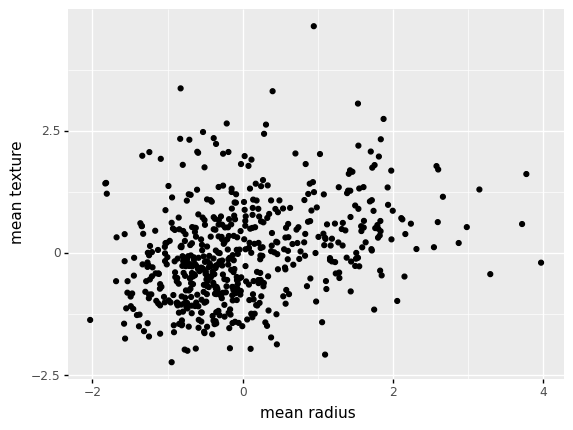

<ggplot: (159491107250)>

In [6]:
ggplot(df, aes(x = "mean radius", y = "mean texture")) + geom_point()

In [8]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_


array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [9]:
pcaDF = pd.DataFrame({"pc": range(1,31),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343


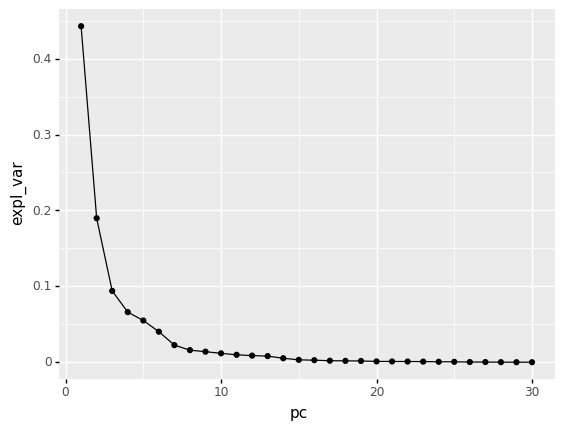

<ggplot: (143510922963)>

In [141]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

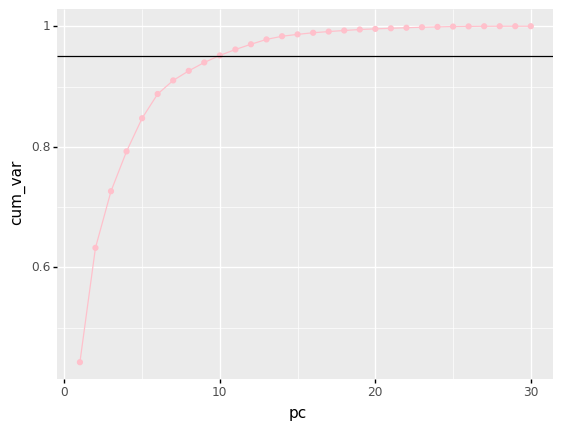

<ggplot: (143510760894)>

In [142]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [10]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])


df10 = pd.DataFrame(data[:, 0:10])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))

#modeMod1
lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))

all data:  0.9876977152899824
10 PCs:    0.9859402460456942
4 PCs:     0.9701230228471002
